In [1]:
import os
import pymongo
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
# convert cpu unit 'n' to 'm'
def convert_cpu(x):
    if x != 0:
        if x[-1] == 'n':
            return round(int(x[:-1])/1000000)
        elif x[-1] == 'm':
            return int(x[:-1])
    else:
        return 0
    
# convert memory unit 'k' and 'Ki' to 'Mi'
# 1k = 1000/1024 Ki = 1000/1024**2 Mi
def convert_mem(x):
    if x != 0:
        if x[-1] == 'k':
            return round(int(x[:-1])*1000/1024**2)
        elif x[-2:] == 'Ki':
            return round(int(x[:-2])/1024)
        elif x[-2:] == 'Mi':
            return int(x[:-2])
    else:
        return 0

In [5]:
def plot_curve(db_name):
    #mongodb
    mongoclient = pymongo.MongoClient("mongodb://localhost:27017/")
    db = mongoclient[db_name]
    print(db.name)
    
    #data process
    collist = db.list_collection_names()
    vpa = pd.DataFrame(list(db['vpa'].find()))
    vpa['time'] = pd.to_datetime(vpa['time'],unit='s').round('1s')
    record = {}
    collist = ['usage', 'requests']
    for col in collist:
        record[col] = pd.DataFrame(list(db[col].find()))
        # convert timestamp to time
        record[col]['time'] = pd.to_datetime(record[col]['time'],unit='s').round('1s')
        record[col]['cpu'] = record[col]['cpu'].apply(lambda x: convert_cpu(x))
        record[col]['cpu'] = record[col]['cpu'].fillna(0)
    vpa['target_cpu'] = vpa['target_cpu'].apply(lambda x: convert_cpu(x))
    usage = record['usage']
    usage = usage[usage['pod_name'] == usage.iloc[0]['pod_name']]
    usage=usage[['time','cpu']]
    vpa = vpa[['time','target_cpu']]
    result = pd.merge(usage, vpa, how='right', on="time")
    result['cpu'] = result['cpu'].fillna(0)
    
    #plot
    fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=True,sharey=True)
    ax.plot(result.time, result.cpu,label='CPU Usage Demand',color='lightcoral')
    ax.plot(result.time, result.target_cpu,label='Recommended CPU',color='steelblue', linestyle='--')
    ax.set_ylabel('CPU [millicores]', fontsize=25)
    ax.set_xlabel('Time', fontsize=25)
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    ax.xaxis.set_minor_locator(mdates.MinuteLocator())
#     fig.autofmt_xdate() #rotate labels
    ax.fill_between(result.time, result.cpu, result.target_cpu, where=(result.cpu > result.target_cpu),
                    interpolate=True, color="lightcoral", hatch='', alpha=0.15, label="Insufficient CPU")
    ax.fill_between(result.time, result.cpu, result.target_cpu, where=(result.cpu < result.target_cpu), 
                    interpolate=True, color="steelblue", hatch='', alpha=0.15, label="Slack")
    ax.legend(fontsize=21,loc='upper center',ncol=4,shadow=True,bbox_to_anchor=(0.5, -0.2))
    plt.yticks(size = 25)
    plt.xticks(size = 25)
    plt.grid(True, linestyle='-.')
    #plt.show()
    home = os.path.expanduser('~')
    folder = '{}/results'.format(home)
    if not os.path.exists(folder):
        os.makedirs(folder)
    plt.savefig('{}/{}.png'.format(folder, db.name),bbox_inches='tight')

image_rotate_default
image_rotate_default1s
image_rotate_ema10-5
image_rotate_ema3-2
image_rotate_ema5-3
image_rotate_sma10-5
image_rotate_sma3-2
image_rotate_sma5-3
image_rotate_shorter_default
image_rotate_shorter_default1s
image_rotate_shorter_ema10-5
image_rotate_shorter_ema3-2
image_rotate_shorter_ema5-3
image_rotate_shorter_sma10-5
image_rotate_shorter_sma3-2
image_rotate_shorter_sma5-3
lr_training_default
lr_training_default1s
lr_training_ema10-5
lr_training_ema3-2
lr_training_ema5-3


<ipython-input-5-5cc842361942>:28: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(1,1,figsize=(15,5),sharex=True,sharey=True)


lr_training_sma10-5
lr_training_sma3-2
lr_training_sma5-3
video_processing_127m_default
video_processing_127m_default1s
video_processing_127m_ema10-5
video_processing_127m_ema3-2
video_processing_127m_ema5-3
video_processing_127m_sma10-5
video_processing_127m_sma3-2
video_processing_127m_sma5-3
video_processing_17m_default
video_processing_17m_default1s
video_processing_17m_ema10-5
video_processing_17m_ema3-2
video_processing_17m_ema5-3
video_processing_17m_sma10-5
video_processing_17m_sma3-2
video_processing_17m_sma5-3
video_processing_67m_default
video_processing_67m_default1s
video_processing_67m_ema10-5
video_processing_67m_ema3-2
video_processing_67m_ema5-3
video_processing_67m_sma10-5
video_processing_67m_sma3-2
video_processing_67m_sma5-3
redis_ema5-3-origin
redis_ema5-3


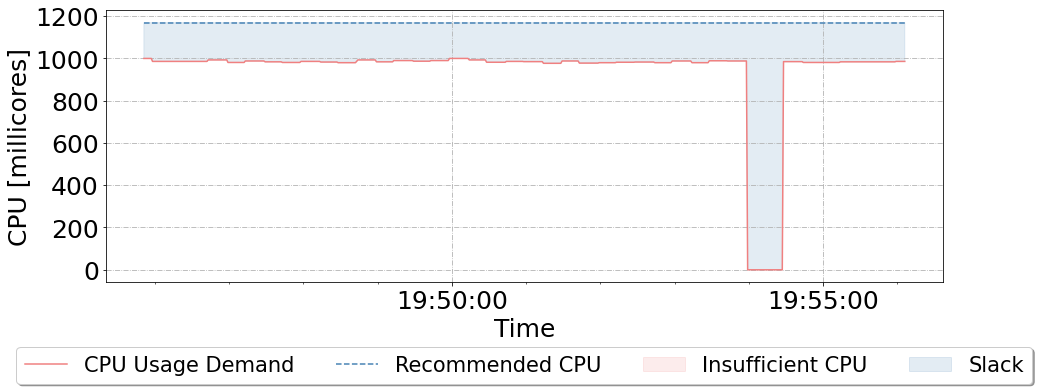

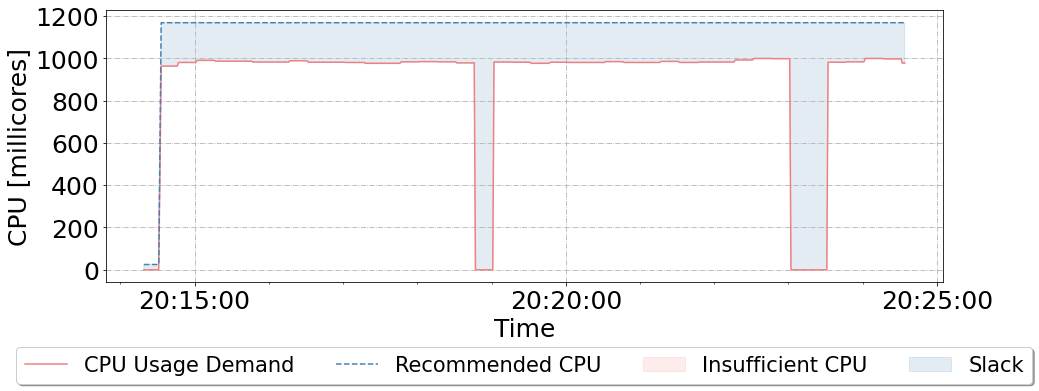

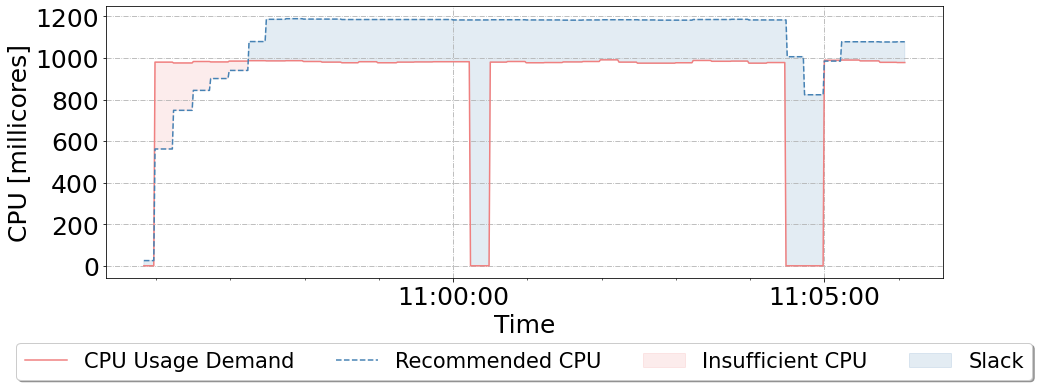

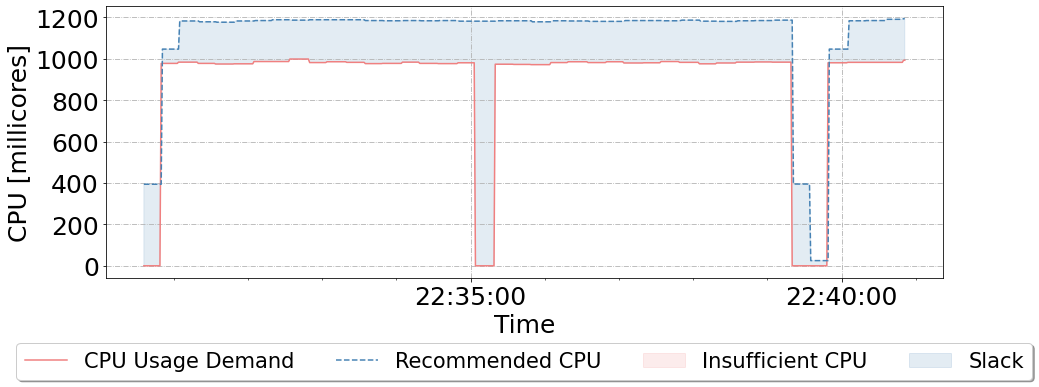

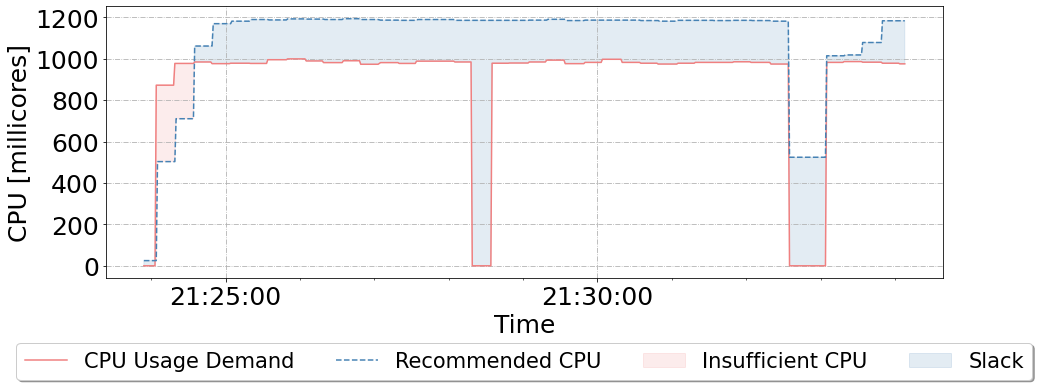

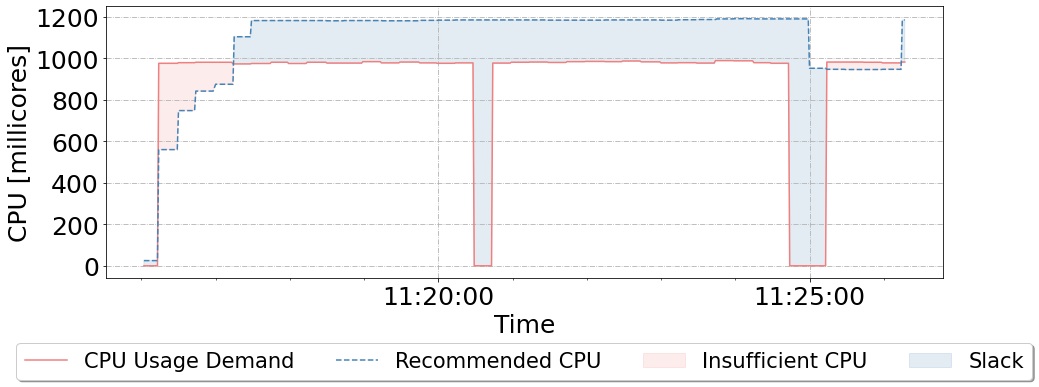

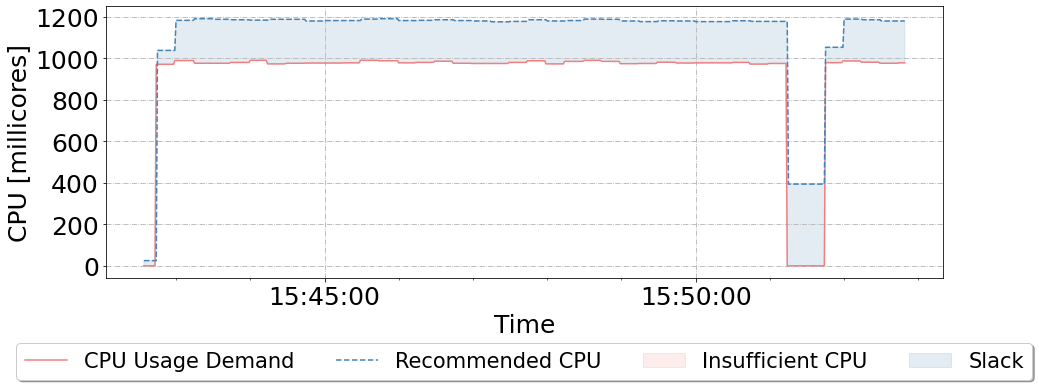

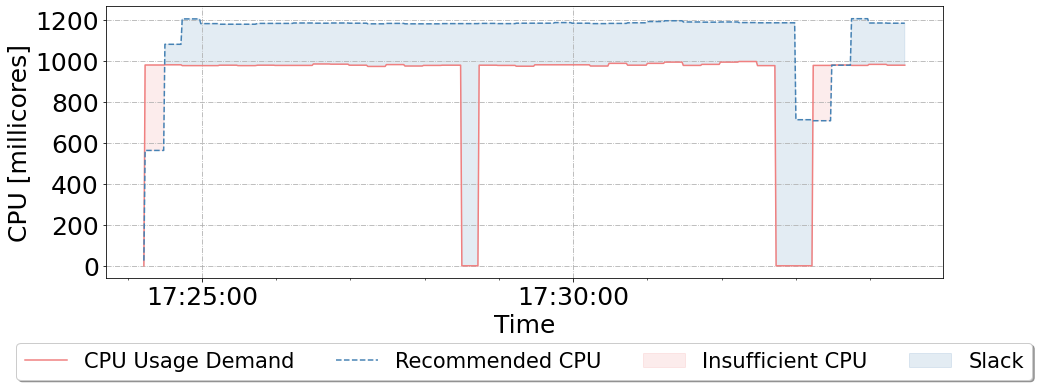

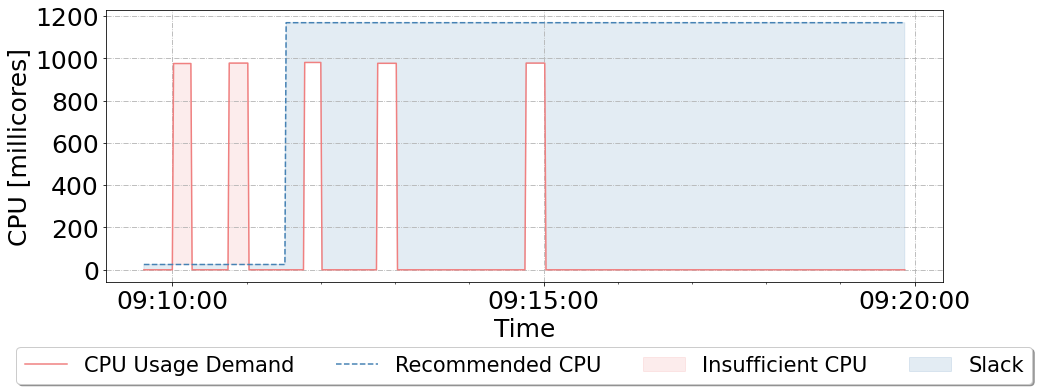

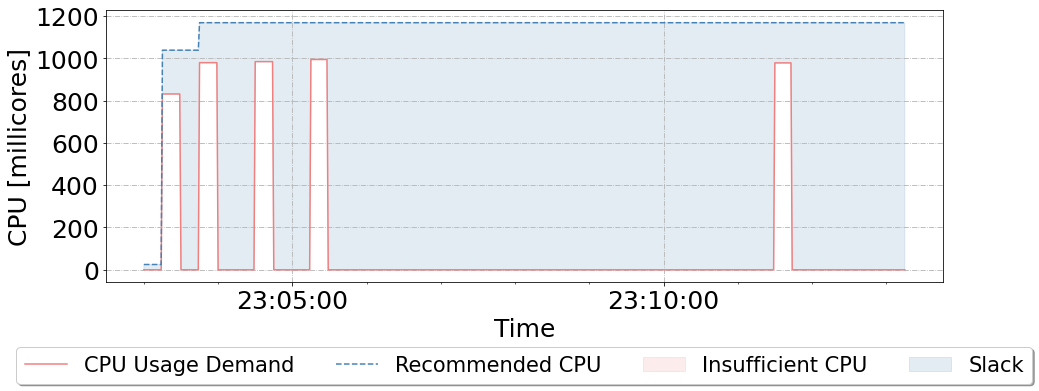

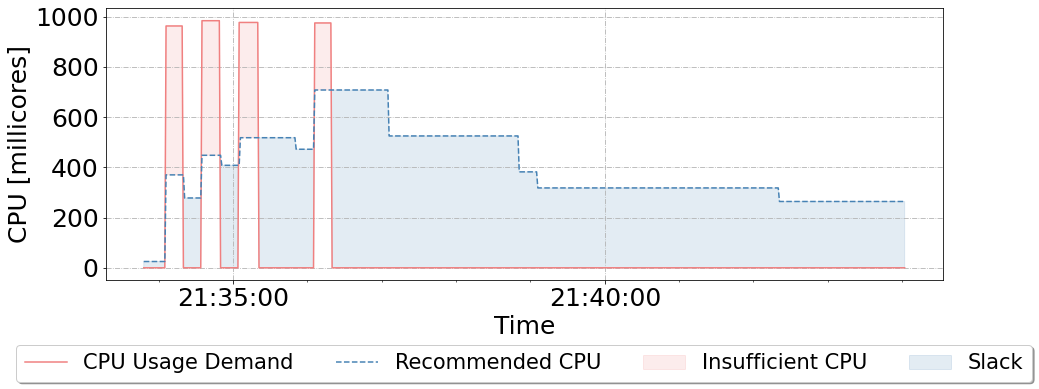

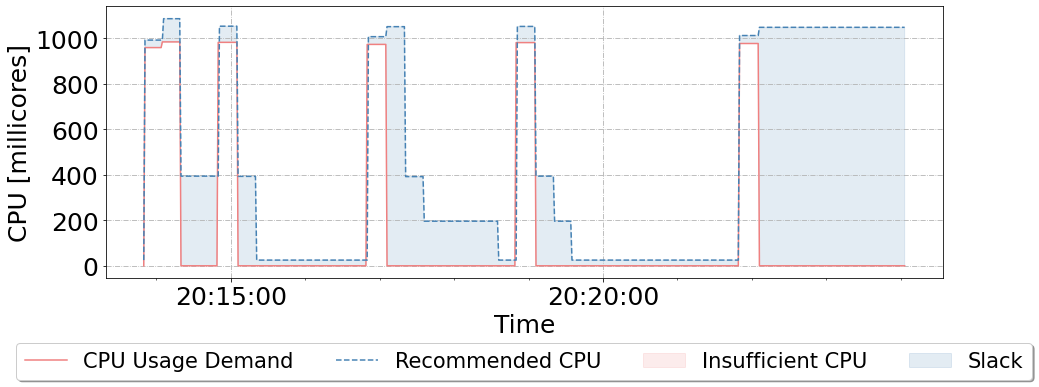

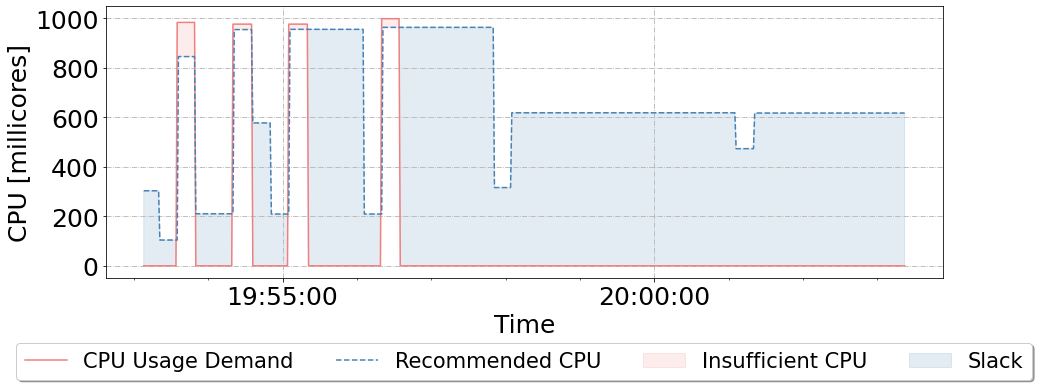

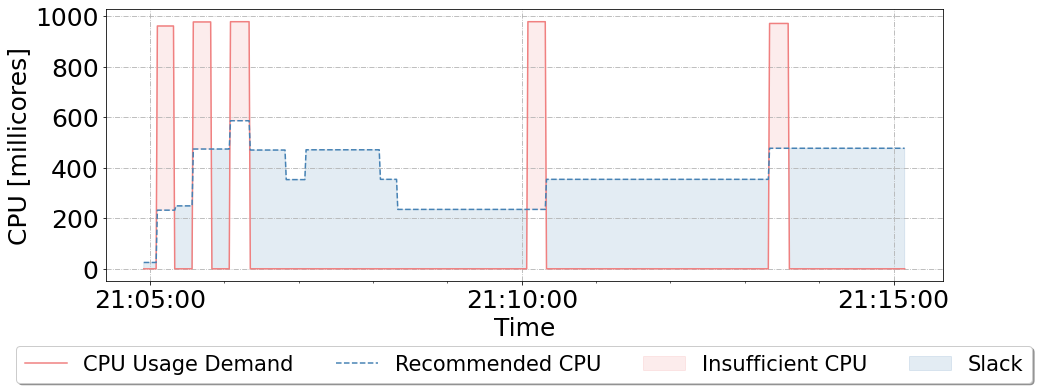

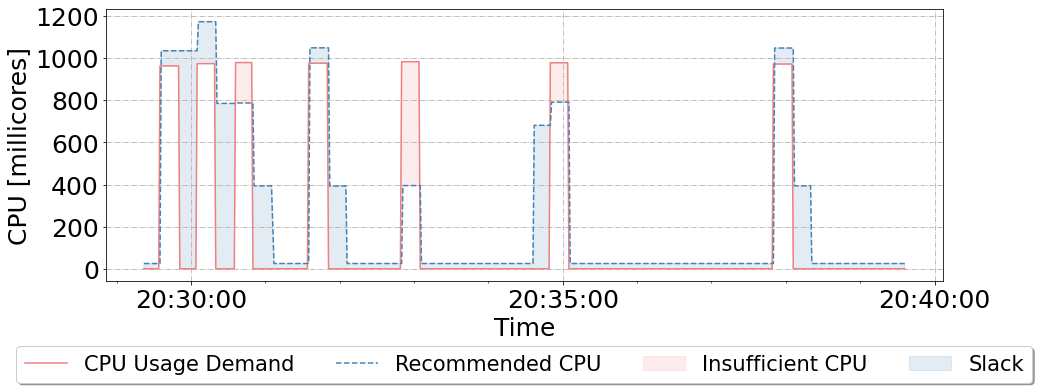

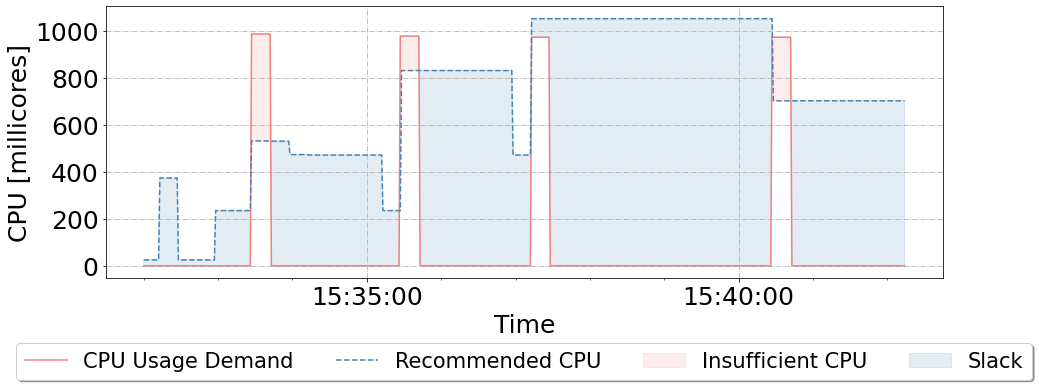

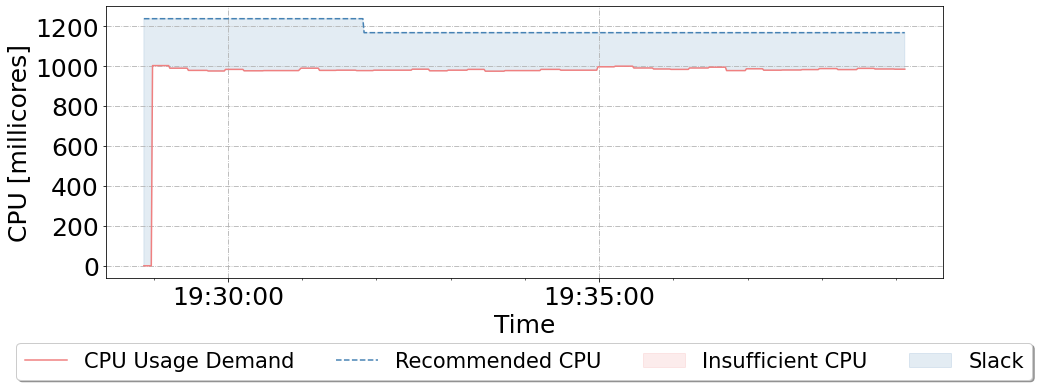

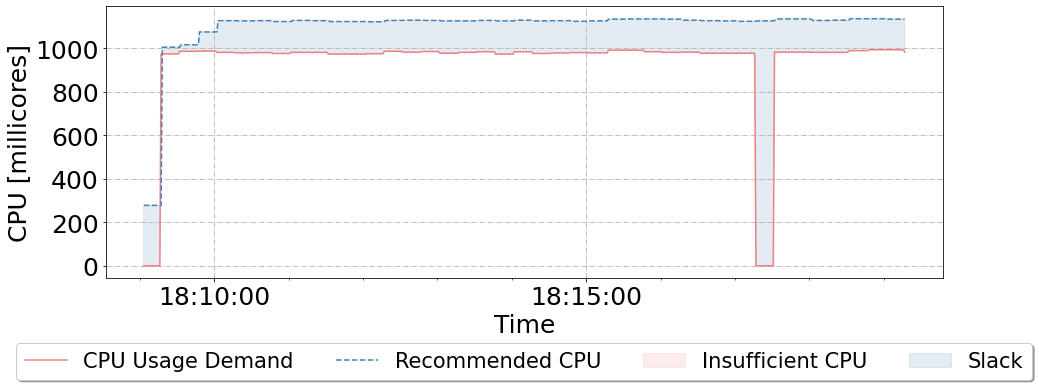

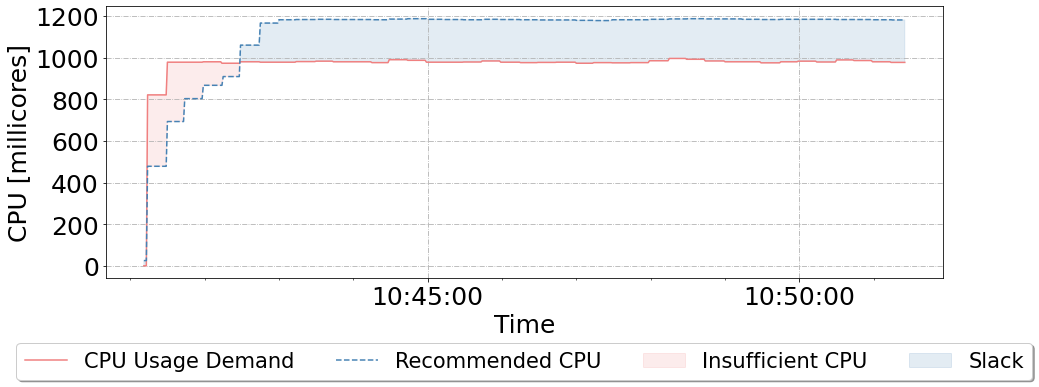

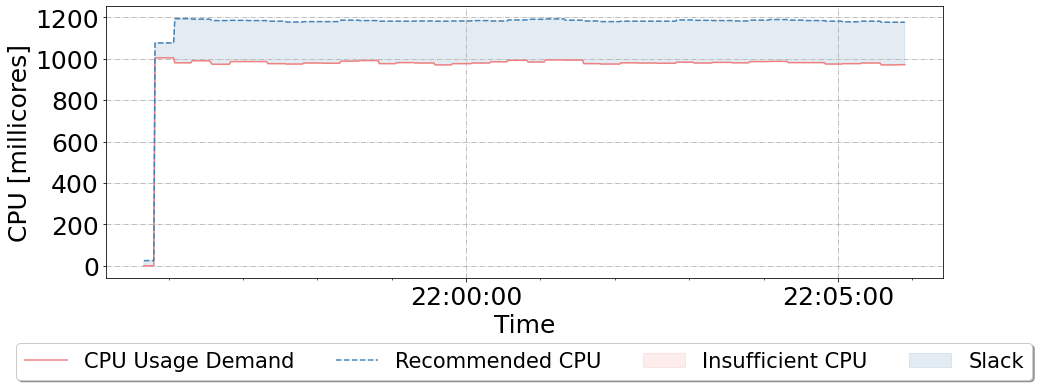

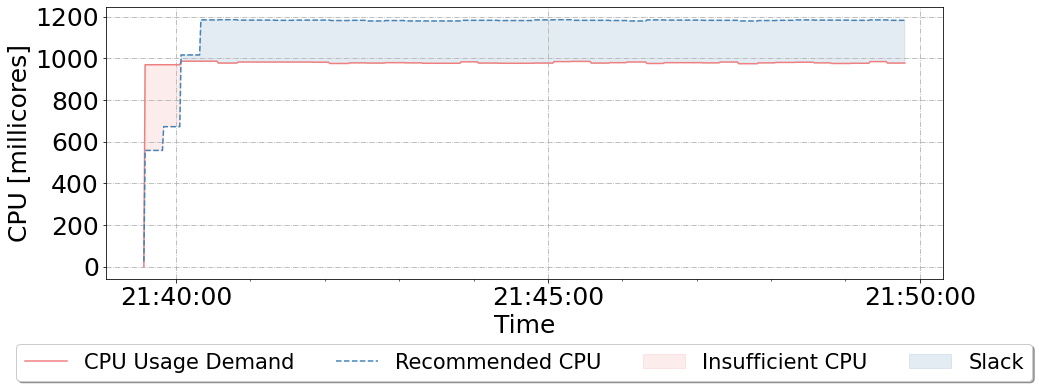

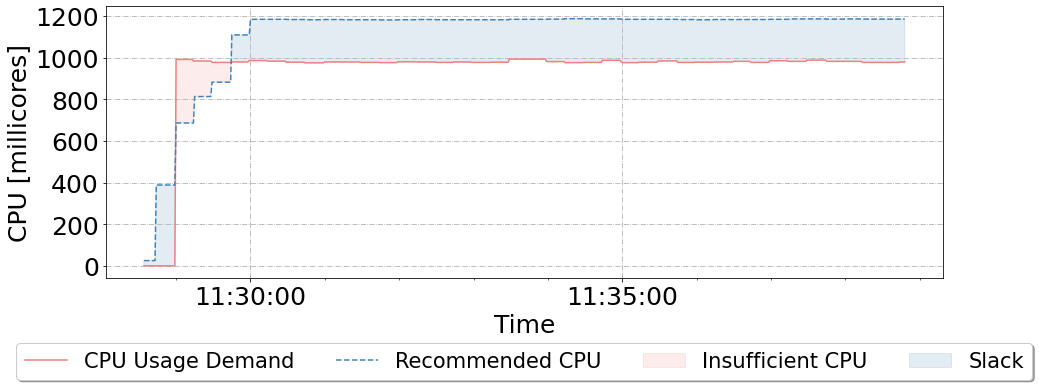

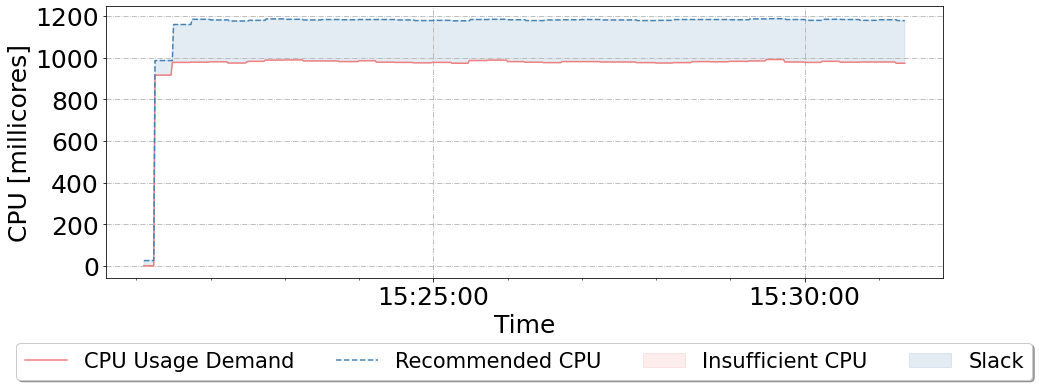

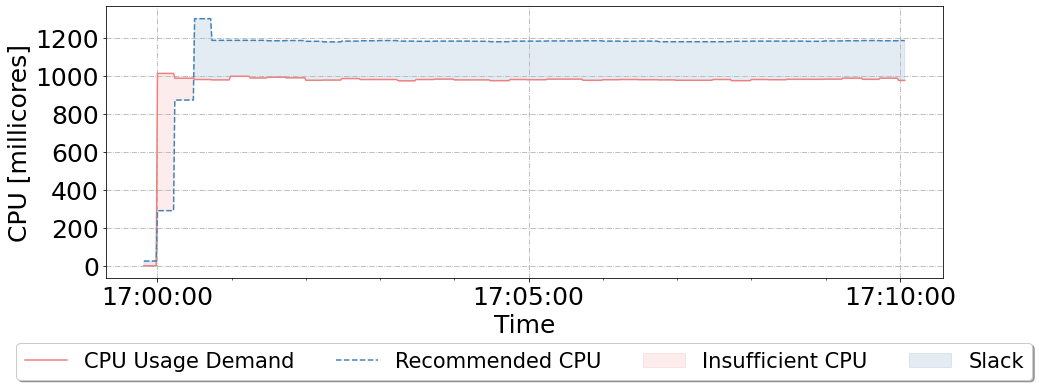

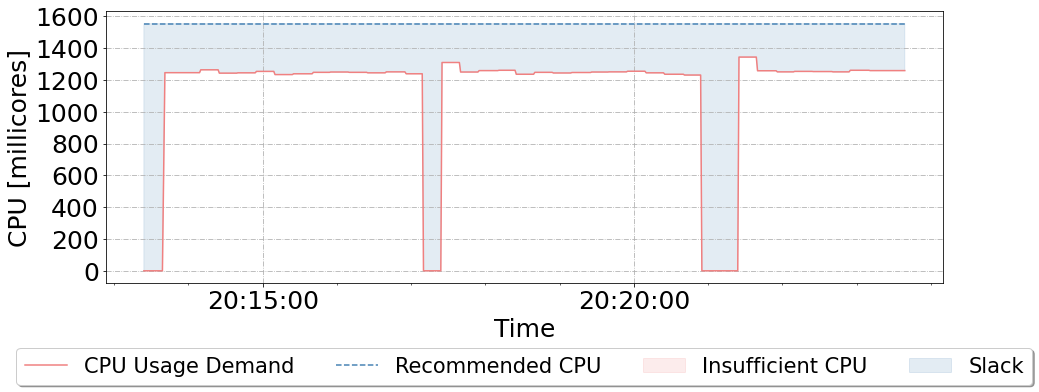

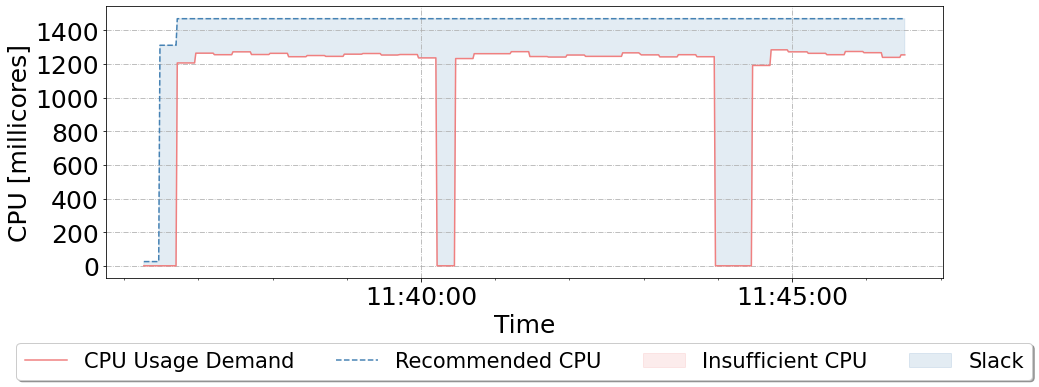

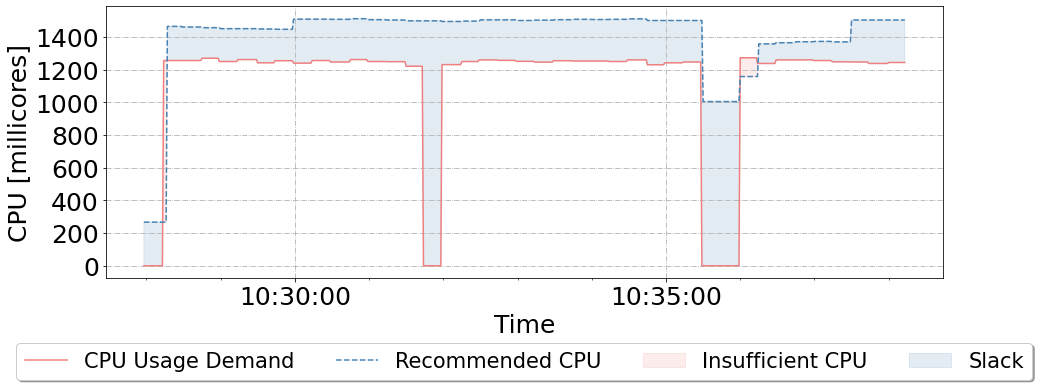

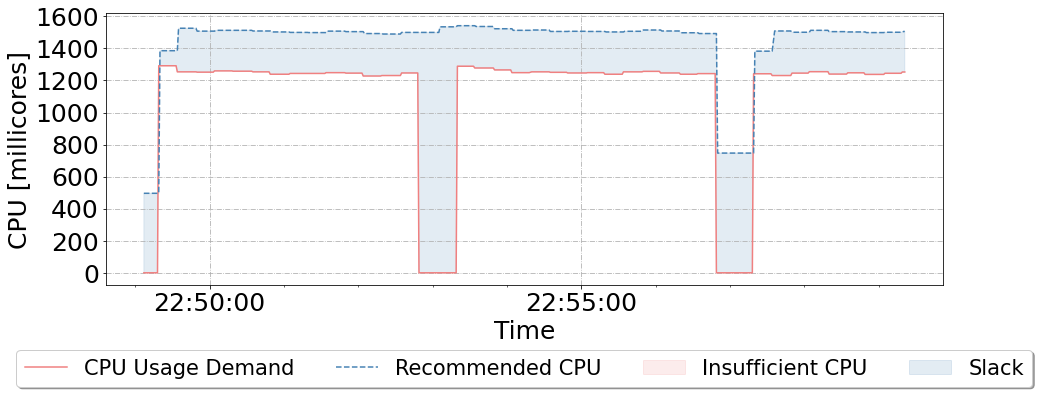

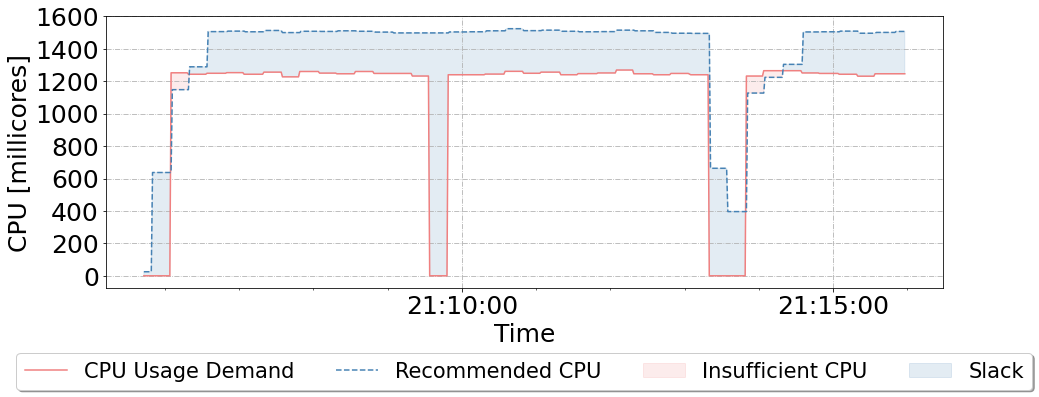

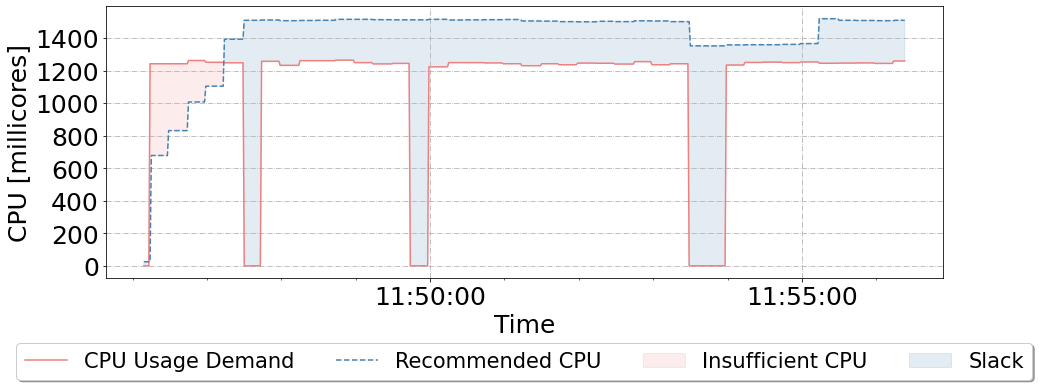

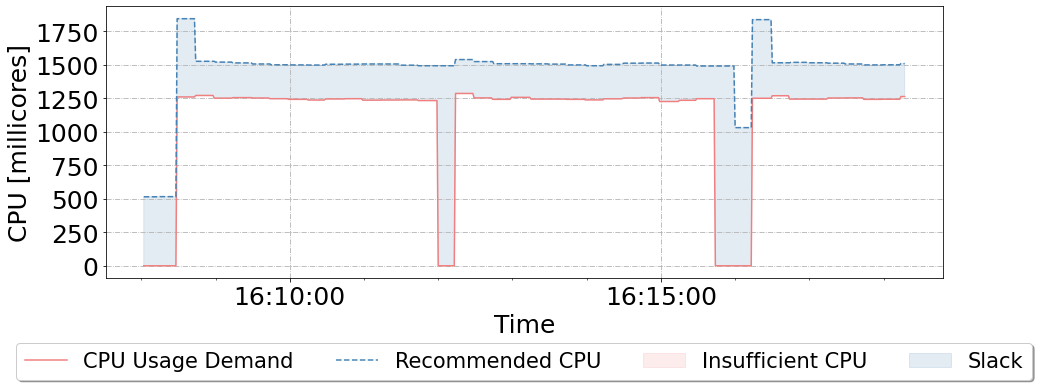

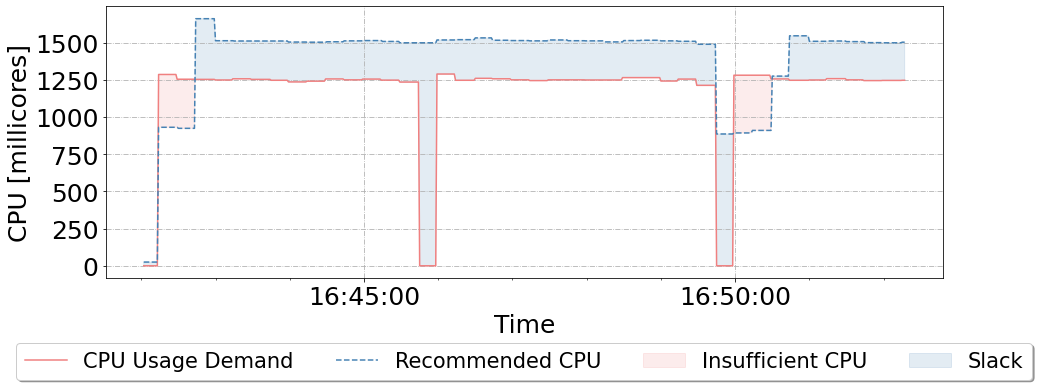

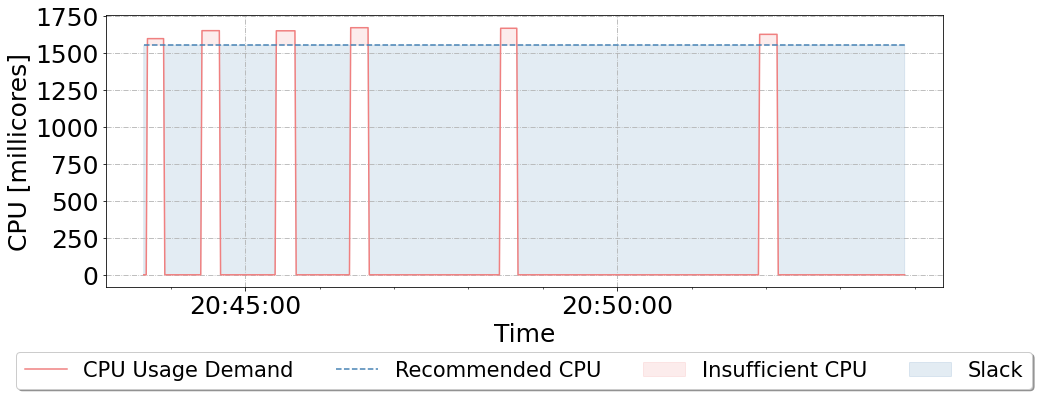

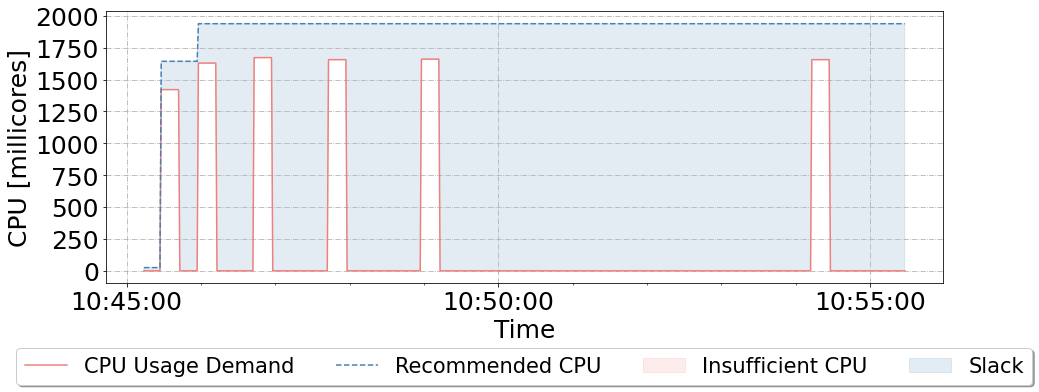

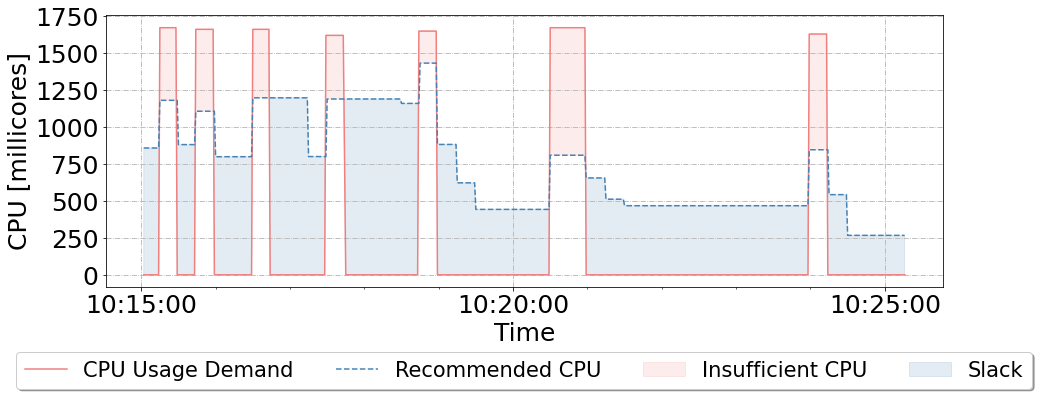

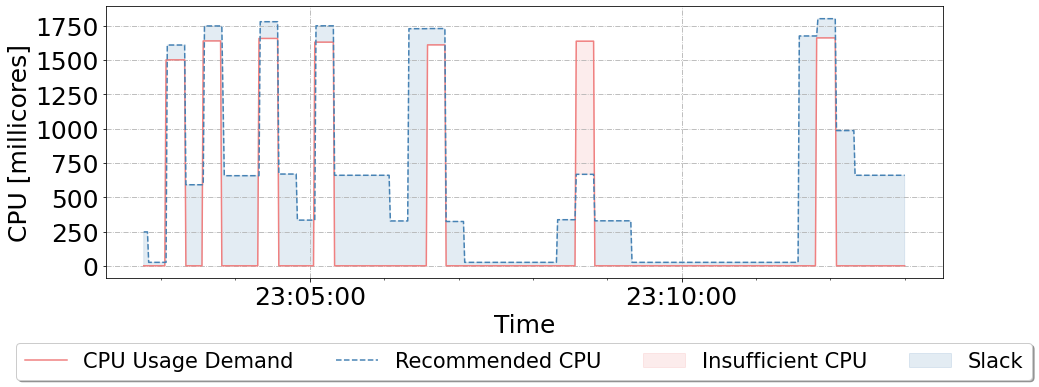

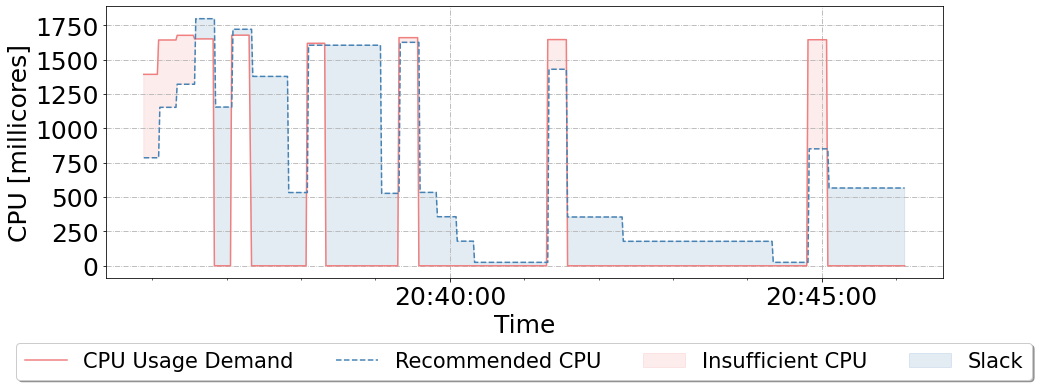

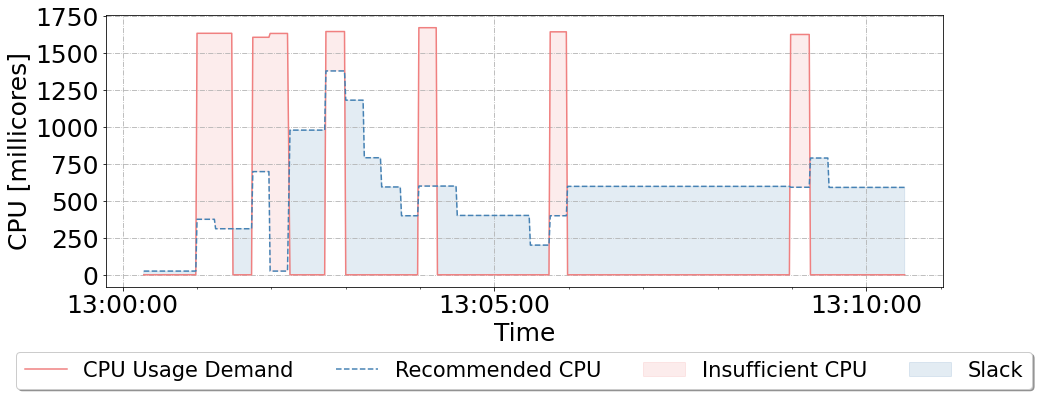

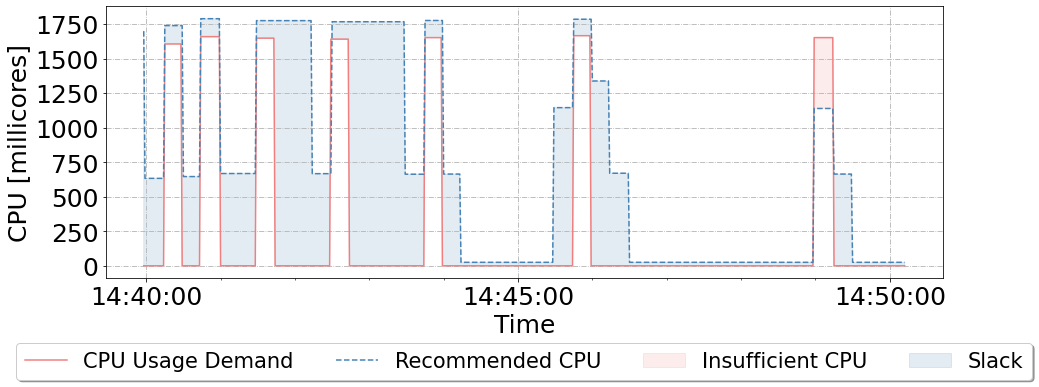

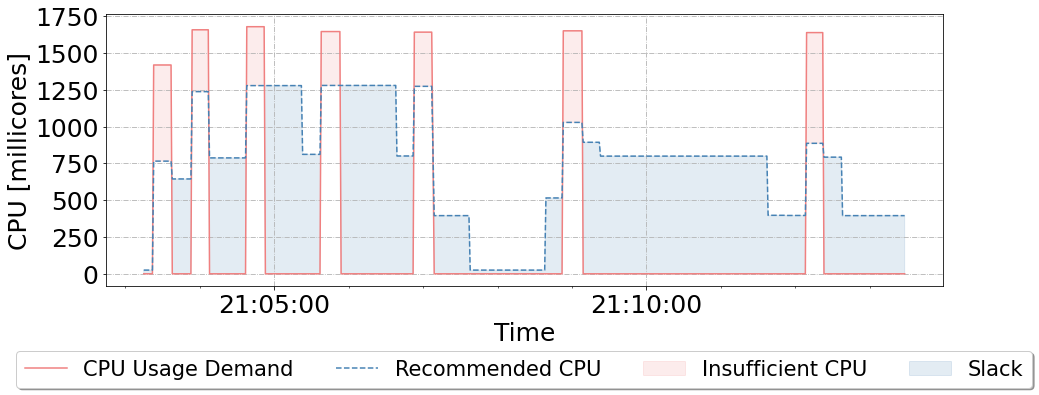

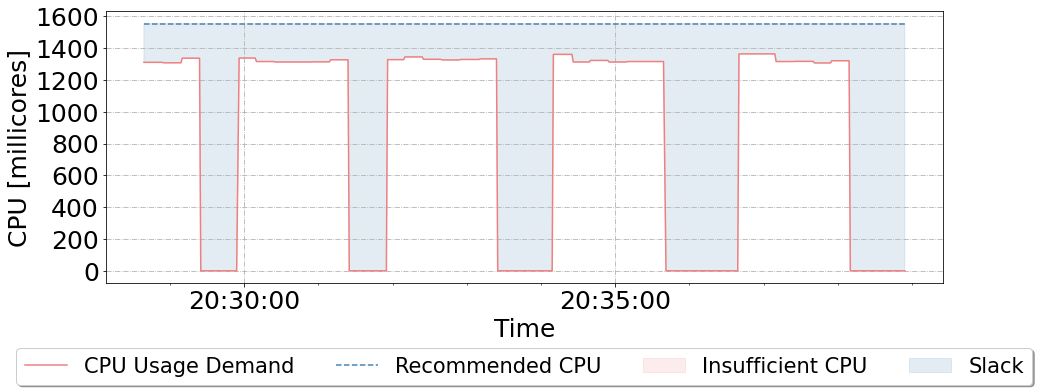

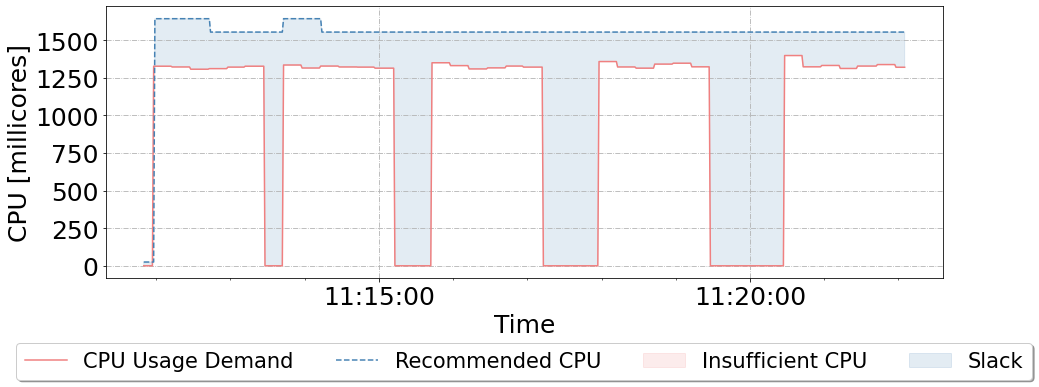

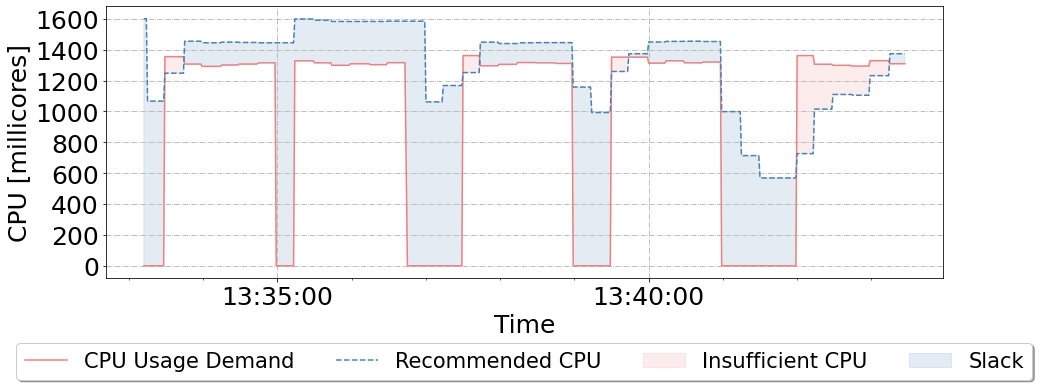

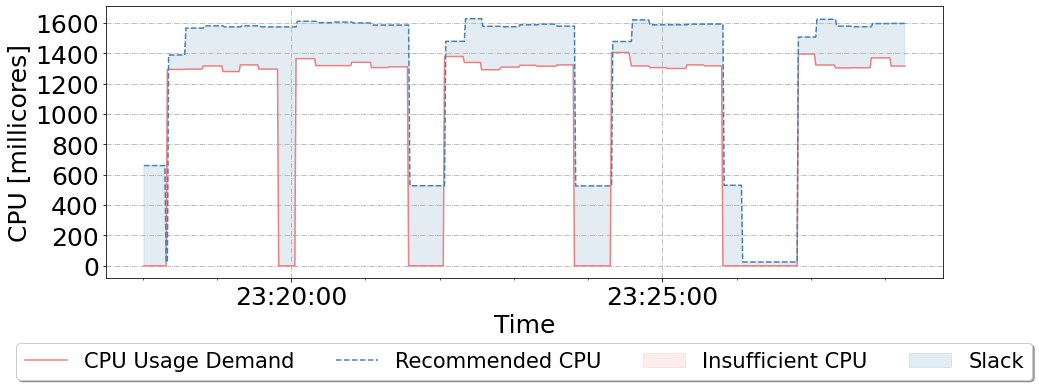

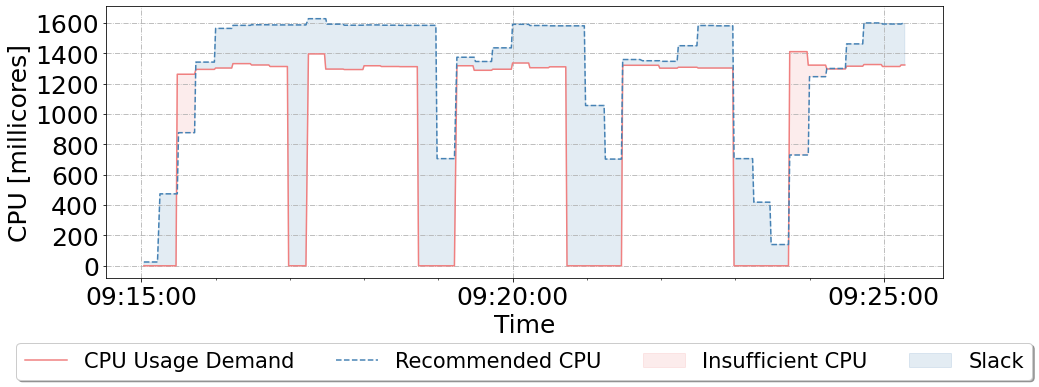

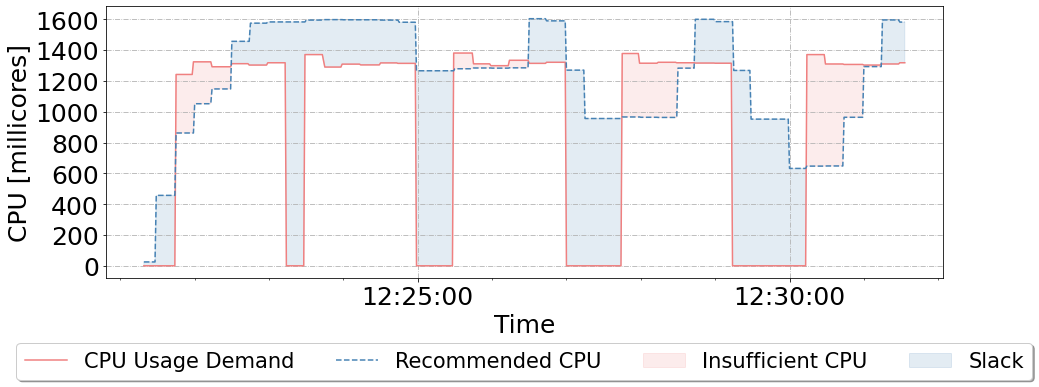

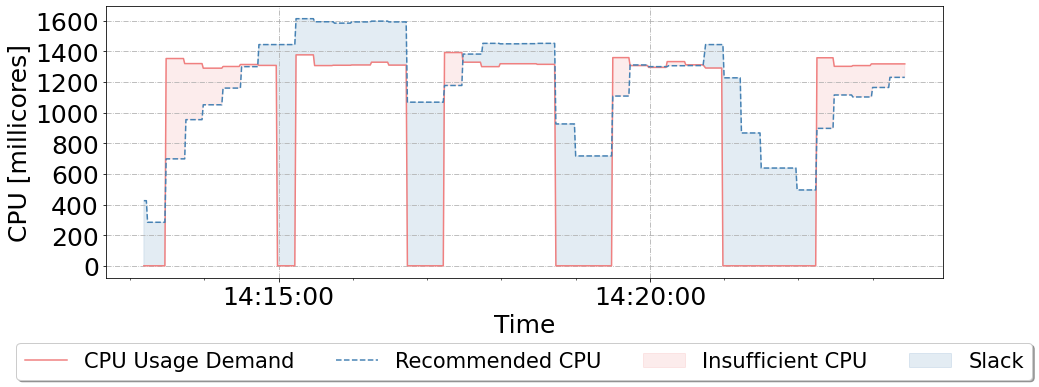

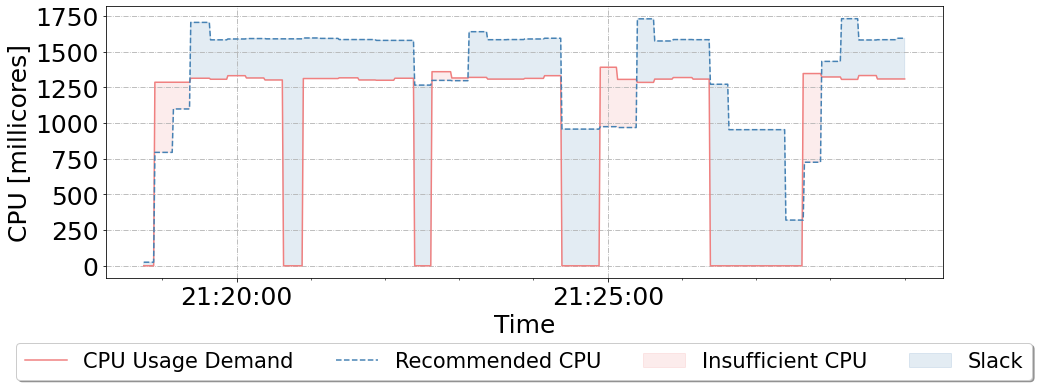

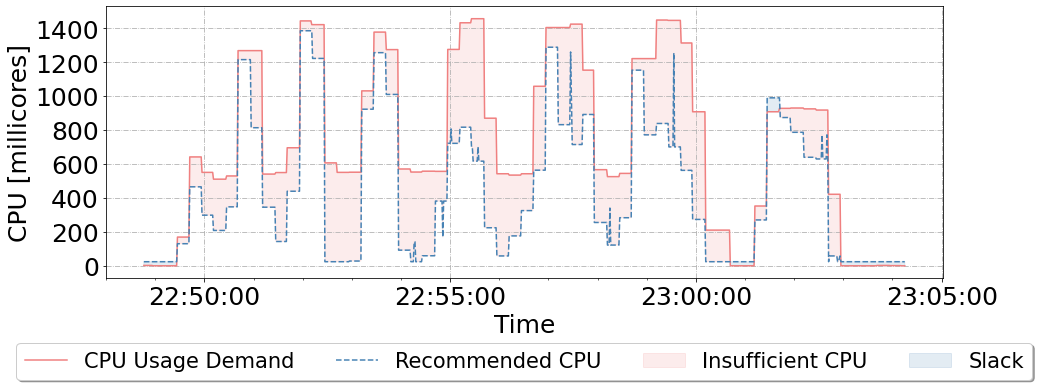

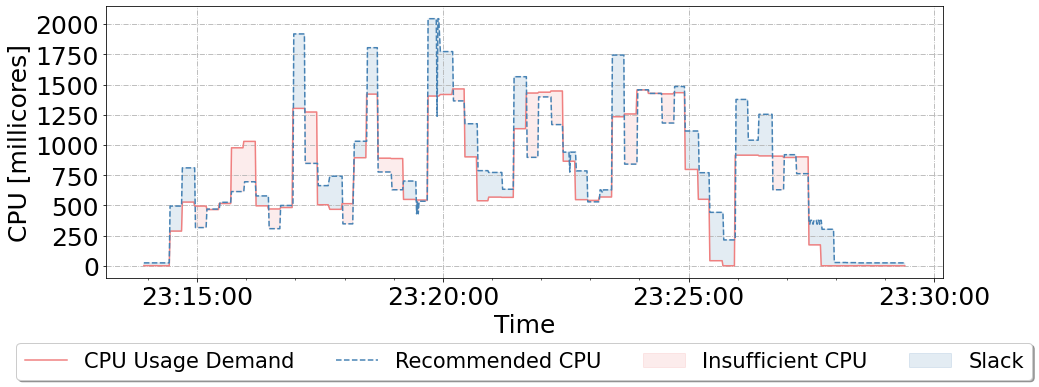

In [6]:
if __name__ == "__main__":
    db_names = ['image_rotate_default','image_rotate_default1s','image_rotate_ema10-5','image_rotate_ema3-2','image_rotate_ema5-3','image_rotate_sma10-5','image_rotate_sma3-2','image_rotate_sma5-3',
               'image_rotate_shorter_default','image_rotate_shorter_default1s','image_rotate_shorter_ema10-5','image_rotate_shorter_ema3-2','image_rotate_shorter_ema5-3','image_rotate_shorter_sma10-5','image_rotate_shorter_sma3-2','image_rotate_shorter_sma5-3',
               'lr_training_default','lr_training_default1s','lr_training_ema10-5','lr_training_ema3-2','lr_training_ema5-3','lr_training_sma10-5','lr_training_sma3-2','lr_training_sma5-3',
               'video_processing_127m_default','video_processing_127m_default1s','video_processing_127m_ema10-5','video_processing_127m_ema3-2','video_processing_127m_ema5-3','video_processing_127m_sma10-5','video_processing_127m_sma3-2','video_processing_127m_sma5-3',
               'video_processing_17m_default','video_processing_17m_default1s','video_processing_17m_ema10-5','video_processing_17m_ema3-2','video_processing_17m_ema5-3','video_processing_17m_sma10-5','video_processing_17m_sma3-2','video_processing_17m_sma5-3',
               'video_processing_67m_default','video_processing_67m_default1s','video_processing_67m_ema10-5','video_processing_67m_ema3-2','video_processing_67m_ema5-3','video_processing_67m_sma10-5','video_processing_67m_sma3-2','video_processing_67m_sma5-3',
               'redis_ema5-3-origin','redis_ema5-3'
               ]
    for db in db_names:
        plot_curve(db)